## Classification of the rock-paper-scissors data

Data: [Rock-Paper-Scissors dataset](http://www.laurencemoroney.com/rock-paper-scissors-dataset/)

In [5]:
# %%writefile download.sh

# !/bin/bash
# fileid="$1"
# filename="$2"
# html=`curl -ac ./cookie -s -L "https://drive.google.com/uc?export=download&id=${fileid}"`
# curl -Lb ./cookie "https://drive.google.com/uc?export=download&`echo ${html}|grep -Po '(confirm=[a-zA-Z0-9\-_]+)'`&id=${fileid}" -o ${filename}

In [7]:
# #Download the train set
# !bash download.sh 1DYVMuV2I_fA6A3er-mgTavrzKuxwpvKV rps.zip
# #Download the test set
# !bash download.sh 1RaodrRK1K03J_dGiLu8raeUynwmIbUaM rps-test-set.zip


In [4]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

--2022-07-08 10:22:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4007:814::2010, 2607:f8b0:4007:815::2010, 2607:f8b0:4007:809::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4007:814::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M  3.40MB/s    in 59s     

2022-07-08 10:23:16 (3.24 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]



In [6]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-07-08 10:27:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4007:80a::2010, 2607:f8b0:4007:814::2010, 2607:f8b0:4007:815::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4007:80a::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  3.24MB/s    in 8.6s    

2022-07-08 10:28:05 (3.26 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [8]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [9]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png', 'rock04-071.png', 'rock05ck01-098.png', 'rock02-008.png', 'rock07-k03-013.png', 'rock02-034.png']
['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png', 'paper02-099.png', 'paper04-037.png', 'paper04-023.png', 'paper02-066.png', 'paper02-072.png']
['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png', 'scissors03-113.png', 'scissors03-107.png', 'testscissors02-051.png', 'testscissors02-045.png', 'scissors01-002.png']


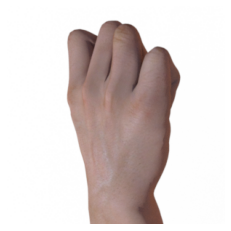

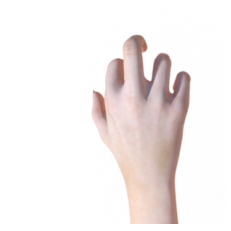

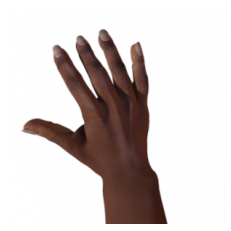

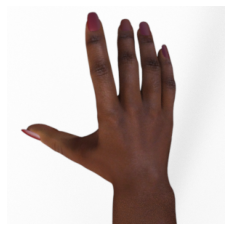

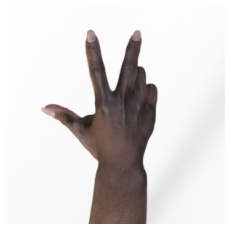

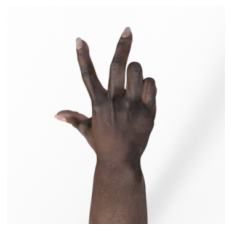

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [14]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [15]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [21]:
#from tensorflow.keras import callbacks 
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', min_lr=0.001,
                        patience=5, mode='min',
                        verbose=1)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', 
                             filepath='./model-check.h5', 
                             save_best_only=True)

callbacks = [
    early_stopping,
    reduce_lr,
    model_checkpoint
]

In [22]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks=[callbacks])


Epoch 1/25
20/20 [==============================] - 41s 2s/step - loss: 1.5022 - accuracy: 0.3663 - val_loss: 1.0975 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/25
20/20 [==============================] - 45s 2s/step - loss: 1.0916 - accuracy: 0.4040 - val_loss: 1.0585 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 3/25
20/20 [==============================] - 47s 2s/step - loss: 1.0541 - accuracy: 0.5111 - val_loss: 0.7511 - val_accuracy: 0.9866 - lr: 0.0010
Epoch 4/25
20/20 [==============================] - 45s 2s/step - loss: 0.8343 - accuracy: 0.6258 - val_loss: 0.6023 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/25
20/20 [==============================] - 46s 2s/step - loss: 0.7828 - accuracy: 0.6389 - val_loss: 0.2332 - val_accuracy: 0.9570 - lr: 0.0010
Epoch 6/25
20/20 [==============================] - 46s 2s/step - loss: 0.7419 - accuracy: 0.6960 - val_loss: 0.6636 - val_accuracy: 0.7258 - lr: 0.0010
Epoch 7/25
20/20 [==============================] - 44s 2s/step - loss: 0.4973 - a

In [26]:
# The model weights (that are considered the best) are loaded into the model.
model.load_weights('./model-check.h5')
model.save("rps.h5")

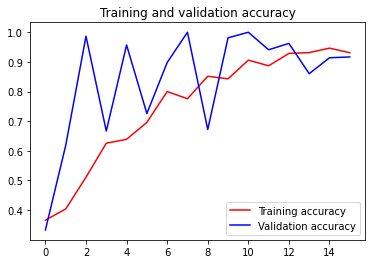

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

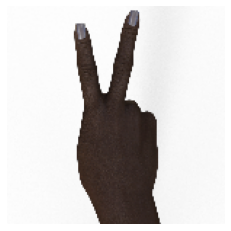

1/1 [==============================] - 0s 34ms/step
scissors-hires1.png
[[0. 0. 1.]]


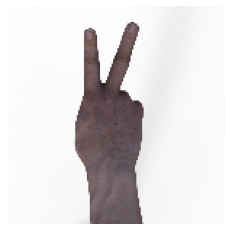

1/1 [==============================] - 0s 32ms/step
scissors-hires2.png
[[0. 0. 1.]]


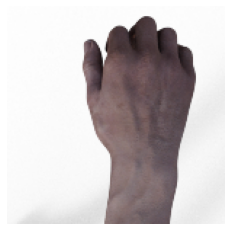

1/1 [==============================] - 0s 28ms/step
rock3.png
[[0. 1. 0.]]


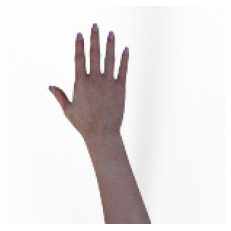

1/1 [==============================] - 0s 28ms/step
paper4.png
[[1. 0. 0.]]


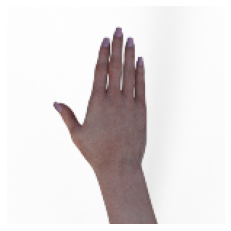

1/1 [==============================] - 0s 33ms/step
paper5.png
[[1. 0. 0.]]


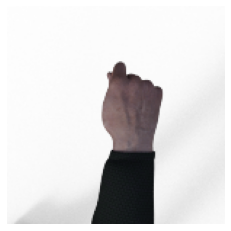

1/1 [==============================] - 0s 43ms/step
rock2.png
[[0. 1. 0.]]


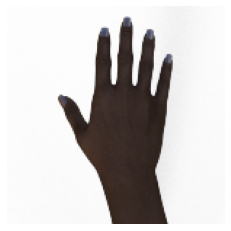

1/1 [==============================] - 0s 28ms/step
paper7.png
[[1. 0. 0.]]


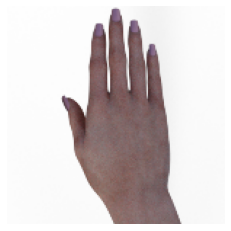

1/1 [==============================] - 0s 33ms/step
paper6.png
[[1. 0. 0.]]


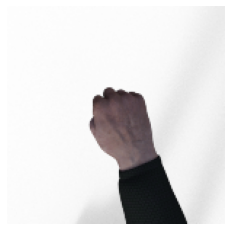

1/1 [==============================] - 0s 41ms/step
rock1.png
[[0. 1. 0.]]


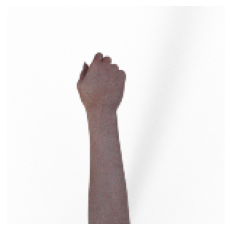

1/1 [==============================] - 0s 35ms/step
rock5.png
[[0. 1. 0.]]


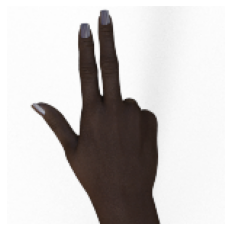

1/1 [==============================] - 0s 37ms/step
scissors9.png
[[0. 0. 1.]]


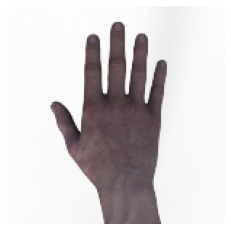

1/1 [==============================] - 0s 26ms/step
paper2.png
[[1. 0. 0.]]


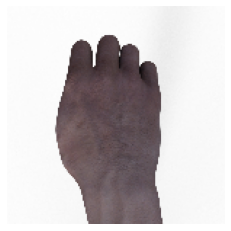

1/1 [==============================] - 0s 33ms/step
rock-hires2.png
[[0. 1. 0.]]


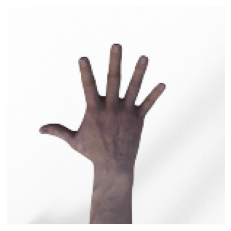

1/1 [==============================] - 0s 29ms/step
paper3.png
[[0. 0. 1.]]


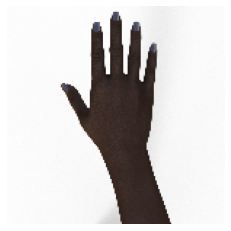

1/1 [==============================] - 0s 34ms/step
paper-hires1.png
[[1. 0. 0.]]


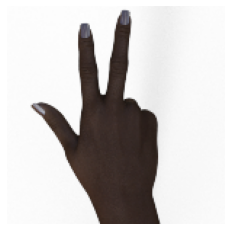

1/1 [==============================] - 0s 25ms/step
scissors8.png
[[0. 0. 1.]]


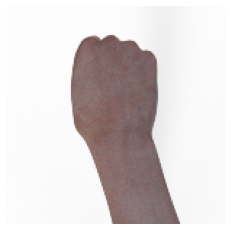

1/1 [==============================] - 0s 37ms/step
rock4.png
[[0. 1. 0.]]


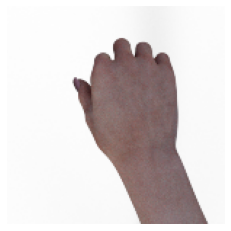

1/1 [==============================] - 0s 33ms/step
rock6.png
[[0. 1. 0.]]


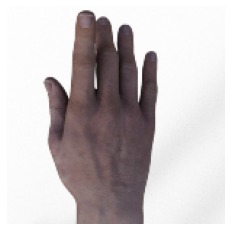

1/1 [==============================] - 0s 25ms/step
paper1.png
[[6.2227804e-37 1.0000000e+00 0.0000000e+00]]


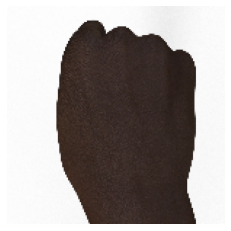

1/1 [==============================] - 0s 29ms/step
rock-hires1.png
[[0. 1. 0.]]


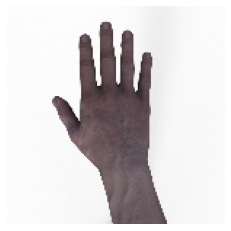

1/1 [==============================] - 0s 28ms/step
paper-hires2.png
[[1. 0. 0.]]


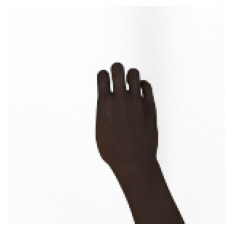

1/1 [==============================] - 0s 32ms/step
rock7.png
[[0. 1. 0.]]


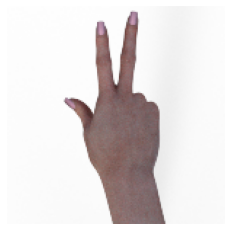

1/1 [==============================] - 0s 24ms/step
scissors6.png
[[0. 0. 1.]]


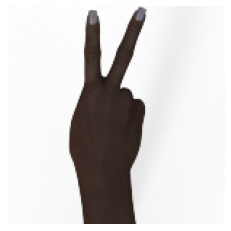

1/1 [==============================] - 0s 29ms/step
scissors7.png
[[0. 0. 1.]]


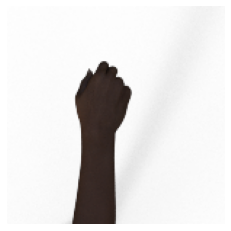

1/1 [==============================] - 0s 30ms/step
rock9.png
[[0. 1. 0.]]


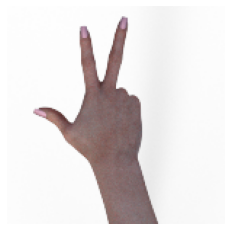

1/1 [==============================] - 0s 32ms/step
scissors5.png
[[0. 0. 1.]]


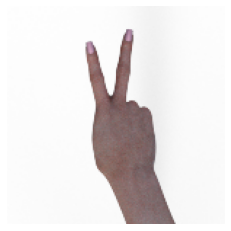

1/1 [==============================] - 0s 37ms/step
scissors4.png
[[0. 0. 1.]]


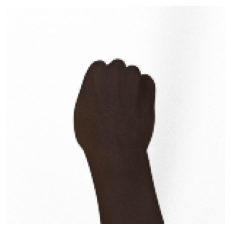

1/1 [==============================] - 0s 31ms/step
rock8.png
[[0. 1. 0.]]


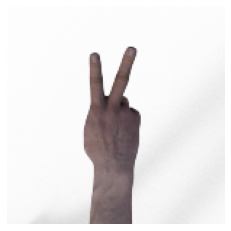

1/1 [==============================] - 0s 30ms/step
scissors1.png
[[0. 0. 1.]]


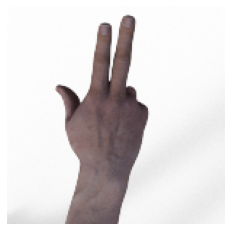

1/1 [==============================] - 0s 31ms/step
scissors3.png
[[0. 0. 1.]]


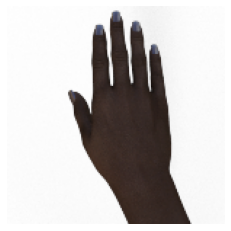

1/1 [==============================] - 0s 23ms/step
paper8.png
[[1. 0. 0.]]


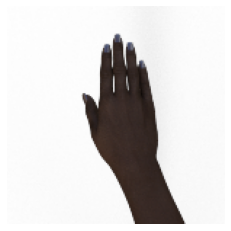

1/1 [==============================] - 0s 26ms/step
paper9.png
[[1.0000000e+00 3.0902742e-26 0.0000000e+00]]


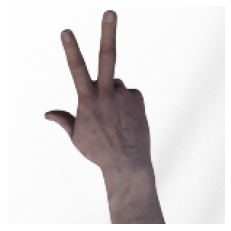

1/1 [==============================] - 0s 24ms/step
scissors2.png
[[0. 0. 1.]]


In [31]:
import numpy as np
from tensorflow.keras.preprocessing import image

#uploaded = files.upload()
val_dir = 'rps-validation'
val_images = os.listdir( val_dir )

#for fn in uploaded.keys():
for i,fn in enumerate(val_images):
    
  # predicting images
  path = './rps-validation/' + fn
  img = image.load_img(path, target_size=(150, 150))
  plt.imshow(img)
  plt.axis('Off')
  plt.show()
    
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)